# Exploring Relationships - EPI data

This script contains:

1. Importing libraries
2. Exploring relationships
    2a. Correlations
    2b. Scatterplots
    2c. Pair plots
    2d. Categorical plots

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# checking matplotlib version
matplotlib.__version__

'3.7.1'

In [3]:
%matplotlib inline

In [4]:
# path to EPI folders
path = r"C:\Users\alabaro\OneDrive - DAI\Documents\EPI Analysis"

In [5]:
# import data file
df_epi_pop_gini = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'epi_pop_gini.pkl'))

# 02. Exploring Relationships

# 2a. Correlations

In [6]:
# check shape
df_epi_pop_gini.shape

(179, 284)

In [7]:
# check columns
df_epi_pop_gini.columns

Index(['code', 'country_code', 'country_x', 'region', 'EPI.new', 'HLT.new',
       'AIR.new', 'HAD.new', 'PMD.new', 'OZD.new',
       ...
       'BCA.rnk.old', 'GHN.rnk.old', 'LCB.rnk.old', 'GIB.rnk.old',
       'GHP.rnk.old', 'country_name', 'pop_2022', '_merge', 'country_y',
       'gini'],
      dtype='object', length=284)

In [8]:
df_epi_pop_gini.head()

,code,country_code,country_x,region,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,...,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old,country_name,pop_2022,_merge,country_y,gini
0,4,AFG,Afghanistan,Southern Asia,43.6,16.0,15.5,7.4,16.0,18.4,...,142,112,12.0,129,1,Afghanistan,41128771,both,Afghanistan,NaN
1,24,AGO,Angola,Sub-Saharan Africa,30.5,20.5,23.1,17.9,24.0,36.8,...,105,119,135.0,1,87,Angola,35588987,both,Angola,51.300000
2,8,ALB,Albania,Eastern Europe,47.1,40.0,37.5,34.5,36.7,63.7,...,173,39,37.0,25,67,Albania,2775634,both,Albania,29.866667
3,784,ARE,United Arab Emirates,Greater Middle East,52.4,49.4,41.7,100.0,3.4,20.4,...,134,157,162.0,141,173,United Arab Emirates,9441129,both,United Arab Emirates,26.000000
4,32,ARG,Argentina,Latin America & Caribbean,41.1,56.3,52.0,60.5,48.2,51.8,...,1,160,128.0,93,134,Argentina,46234830,both,Argentina,42.125000


In [10]:
# Create subset with population, gini, country name, and key EPI indicators

df2 = df_epi_pop_gini[['country_code', 'country_name', 'region', 'pop_2022', 'gini', 'EPI.new', 'ECO.new', 'BDH.new', 'ECS.new', 'FSH.new', 'ACD.new', 'AGR.new', 'WRS.new', 'HLT.new', 'AIR.new', 'H2O.new', 'HMT.new', 'WMG.new', 'PCC.new', 'CCH.new']]

In [11]:
df2.head()

,country_code,country_name,region,pop_2022,gini,EPI.new,ECO.new,BDH.new,ECS.new,FSH.new,ACD.new,AGR.new,WRS.new,HLT.new,AIR.new,H2O.new,HMT.new,WMG.new,PCC.new,CCH.new
0,AFG,Afghanistan,Southern Asia,41128771,NaN,43.6,36.9,30.7,61.8,NaN,35.5,44.2,0.0,16.0,15.5,28.1,0.0,4.4,65.6,65.6
1,AGO,Angola,Sub-Saharan Africa,35588987,51.300000,30.5,28.6,30.1,29.4,24.3,50.5,24.9,0.0,20.5,23.1,12.8,36.7,9.6,37.7,37.7
2,ALB,Albania,Eastern Europe,2775634,29.866667,47.1,45.5,63.9,24.2,17.3,90.2,28.9,1.9,40.0,37.5,54.1,45.5,13.4,52.5,52.5
3,ARE,United Arab Emirates,Greater Middle East,9441129,26.000000,52.4,70.4,80.3,100.0,26.2,59.2,17.4,92.1,49.4,41.7,67.2,53.6,43.4,34.0,34.0
4,ARG,Argentina,Latin America & Caribbean,46234830,42.125000,41.1,38.9,42.4,23.0,5.8,85.4,74.1,5.9,56.3,52.0,64.8,72.2,42.4,35.5,35.5


In [13]:
# Create subset with quantitative variables - population, gini, and key EPI indicators

df3_quant = df_epi_pop_gini[['pop_2022', 'gini', 'EPI.new', 'ECO.new', 'BDH.new', 'ECS.new', 'FSH.new', 'ACD.new', 'AGR.new', 'WRS.new', 'HLT.new', 'AIR.new', 'H2O.new', 'HMT.new', 'WMG.new', 'PCC.new', 'CCH.new']]

In [15]:
df3_quant.corr()

,pop_2022,gini,EPI.new,ECO.new,BDH.new,ECS.new,FSH.new,ACD.new,AGR.new,WRS.new,HLT.new,AIR.new,H2O.new,HMT.new,WMG.new,PCC.new,CCH.new
pop_2022,1.000000,-0.001345,-0.227369,-0.200474,-0.195726,-0.094621,-0.049015,0.024934,0.085614,-0.056311,-0.110448,-0.142200,-0.037263,-0.122620,-0.098941,-0.209028,-0.209028
gini,-0.001345,1.000000,-0.261135,-0.181870,-0.016051,-0.143741,0.067852,-0.203872,-0.132832,-0.337142,-0.376257,-0.321851,-0.430853,-0.295851,-0.345981,-0.113259,-0.113259
EPI.new,-0.227369,-0.261135,1.000000,0.781607,0.578917,0.049542,0.040955,0.710974,0.231163,0.679698,0.787659,0.760846,0.727496,0.699555,0.725594,0.790193,0.790193
ECO.new,-0.200474,-0.181870,0.781607,1.000000,0.864332,0.047571,0.095905,0.497006,0.354076,0.564404,0.514322,0.492616,0.480687,0.461924,0.473027,0.343299,0.343299
BDH.new,-0.195726,-0.016051,0.578917,0.864332,1.000000,-0.315126,-0.070658,0.316633,0.205218,0.351426,0.334094,0.341541,0.276140,0.333065,0.276252,0.177320,0.177320
ECS.new,-0.094621,-0.143741,0.049542,0.047571,-0.315126,1.000000,0.100188,-0.134173,-0.159854,-0.121663,-0.081106,-0.112861,-0.012709,-0.149313,-0.014932,0.118723,0.118723
FSH.new,-0.049015,0.067852,0.040955,0.095905,-0.070658,0.100188,1.000000,-0.132541,-0.096561,0.012351,-0.049430,-0.023444,-0.082946,-0.032999,-0.070763,0.036867,0.036867
ACD.new,0.024934,-0.203872,0.710974,0.497006,0.316633,-0.134173,-0.132541,1.000000,0.225584,0.523930,0.655646,0.633394,0.610581,0.570322,0.599358,0.545270,0.545270
AGR.new,0.085614,-0.132832,0.231163,0.354076,0.205218,-0.159854,-0.096561,0.225584,1.000000,0.351648,0.253600,0.209619,0.294304,0.206883,0.245330,-0.022679,-0.022679
WRS.new,-0.056311,-0.337142,0.679698,0.564404,0.351426,-0.121663,0.012351,0.523930,0.351648,1.000000,0.777606,0.733115,0.737870,0.713367,0.729204,0.341649,0.341649


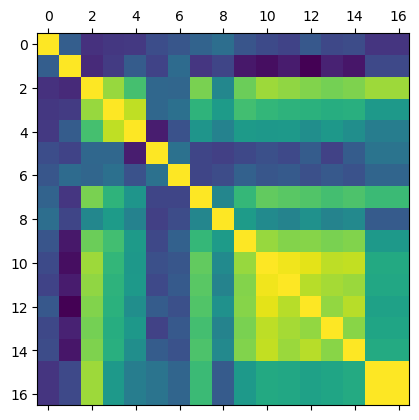

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(df3_quant.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

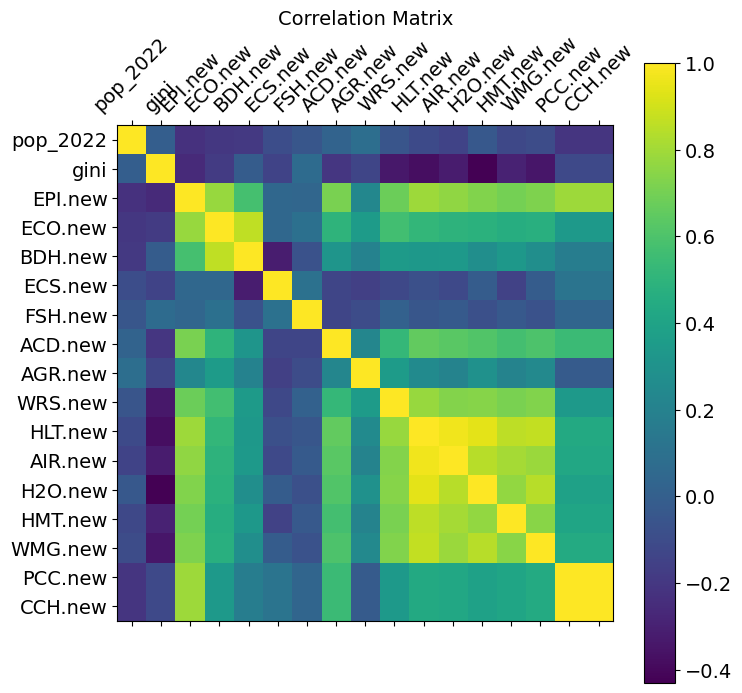

In [19]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df3_quant.corr(), fignum=f.number) # type of plot
plt.xticks(range(df3_quant.shape[1]), df3_quant.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df3_quant.shape[1]), df3_quant.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [23]:
# save figure
f.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'epi_corr.png'))

# create correlation heatmap using seaborn

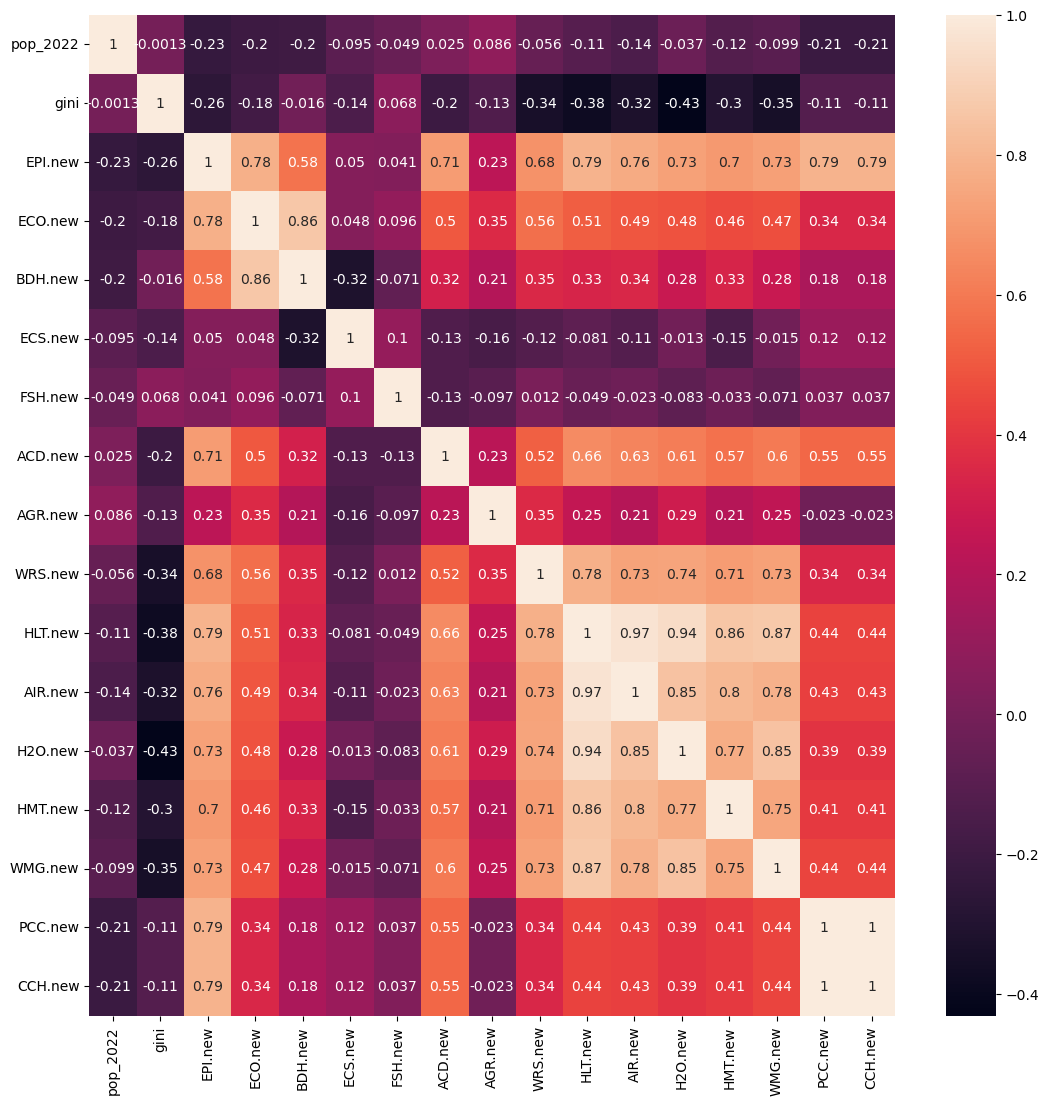

In [27]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(13,13))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df3_quant.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#the correlations between population, gini, and EPI indicators are all negative but weak
#a country's EPI score has a strong, positive correlation with the other sub-indicators except for
#ECS.new (ecosystem services), FSH.new (fisheries), and AGR (agriculture)

In [28]:
# save figure
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'epi_seaborn_corr.png'))

# 2b. Scatterplots

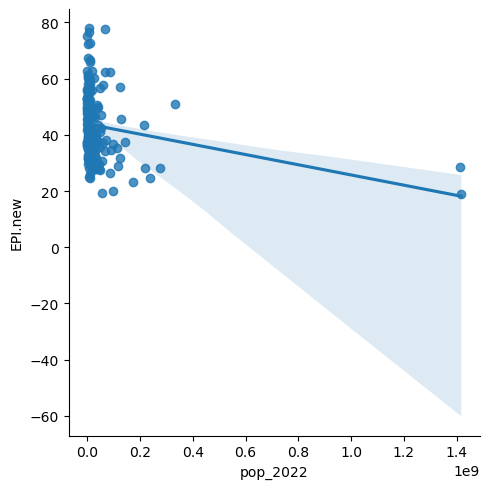

In [29]:
# create a scatterplot for gini and 2022 epi scores

sns.lmplot(x = 'pop_2022', y = 'EPI.new', data = df_epi_pop_gini)

#the correlation between a country's population and their overall EPI score is negative, but fairly weak
#there are two outliers that skew the graph - these are most likely China and India due to their population sizes

# 2c. Pair Plots

In [30]:
# new subset for pop, gini, key EPI variables

df4 = df_epi_pop_gini[['pop_2022', 'gini', 'EPI.new', 'ECO.new', 'HLT.new', 'PCC.new']]

In [31]:
df4.head(2)

,pop_2022,gini,EPI.new,ECO.new,HLT.new,PCC.new
0,41128771,NaN,43.6,36.9,16.0,65.6
1,35588987,51.3,30.5,28.6,20.5,37.7


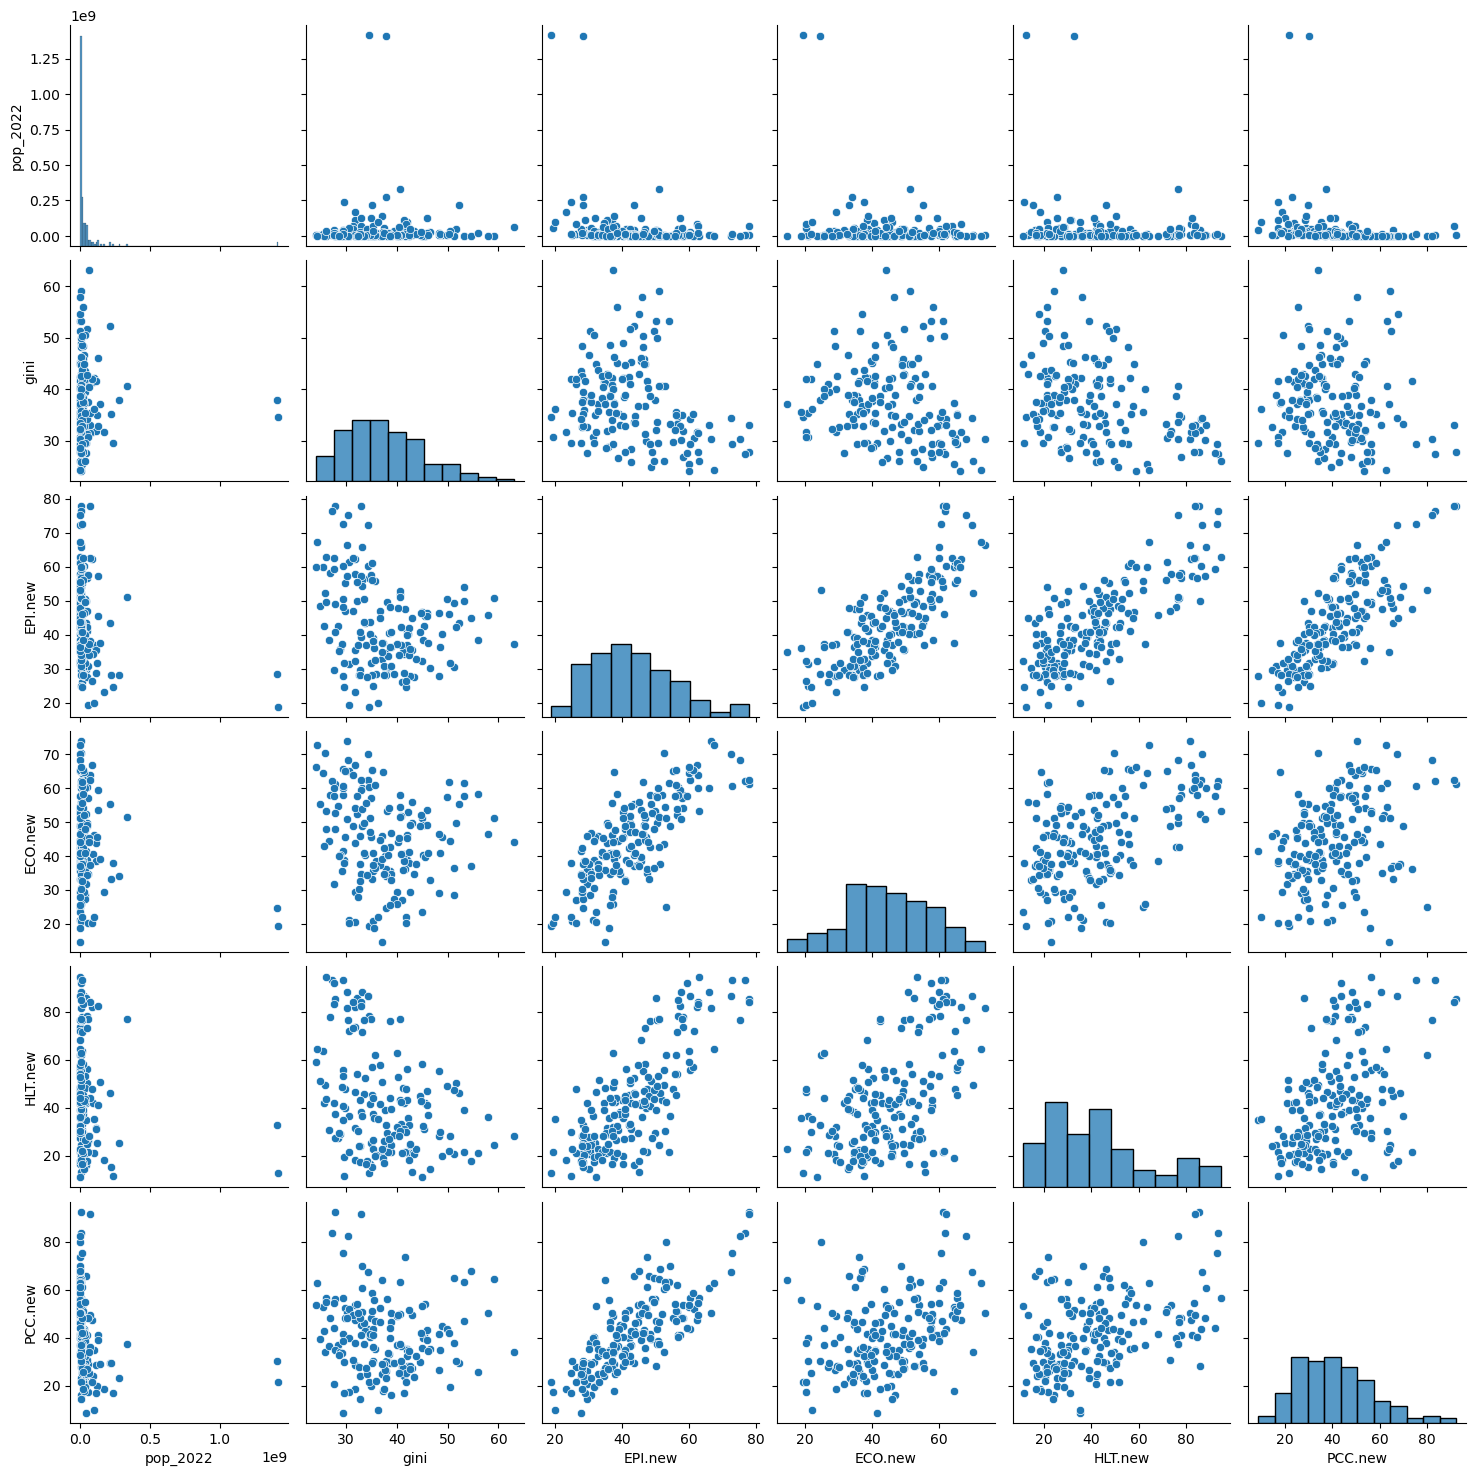

In [32]:
# Create a pair plot 

g = sns.pairplot(df4)

#there doesn't seem to be a stron correlation between population, gini, and a country's EPI score
#similar to the scatterplot above, there are two outliers that skew the graphs - these are most likely China and India due to their population sizes

# 2d. Categorical plots

<Axes: xlabel='EPI.new', ylabel='Count'>

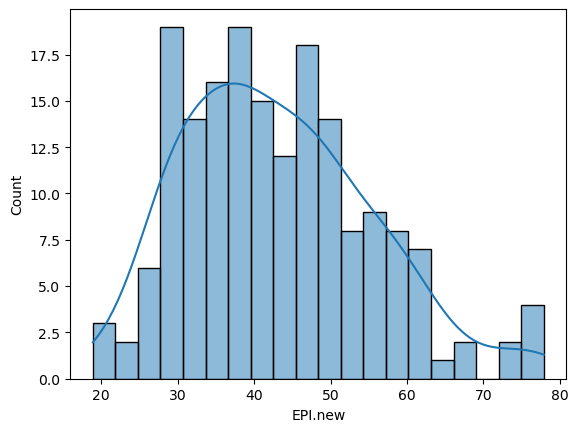

In [33]:
# create categorical plot for EPI scores

sns.histplot(df_epi_pop_gini['EPI.new'], bins = 20, kde = True)

In [34]:
df_epi_pop_gini.loc[df_epi_pop_gini['EPI.new'] < 28, 'EPIcategory'] = 'Low EPI score'

In [35]:
df_epi_pop_gini.loc[(df_epi_pop_gini['EPI.new'] >= 28) & (df_epi_pop_gini['EPI.new'] < 52), 'EPIcategory'] = 'Medium EPI score'

In [36]:
df_epi_pop_gini.loc[df_epi_pop_gini['EPI.new'] >= 52, 'EPIcategory'] = 'High EPI score'

In [37]:
df_epi_pop_gini['EPIcategory'].value_counts(dropna = False)

EPIcategory
Medium EPI score    127
High EPI score       40
Low EPI score        12
Name: count, dtype: int64

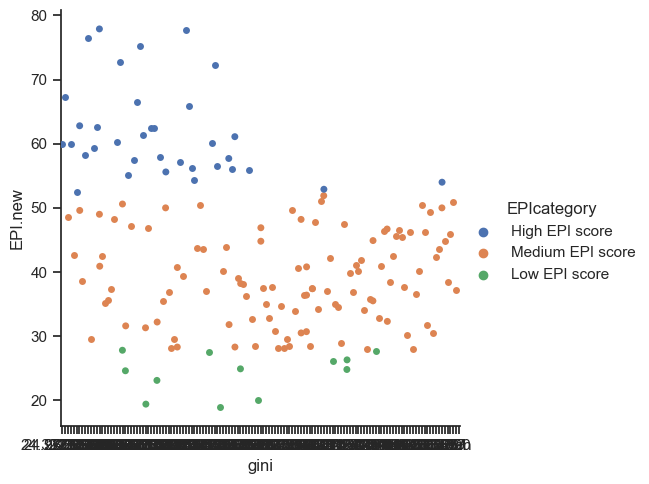

In [38]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
g = sns.catplot(x="gini", y="EPI.new", hue="EPIcategory", data=df_epi_pop_gini)

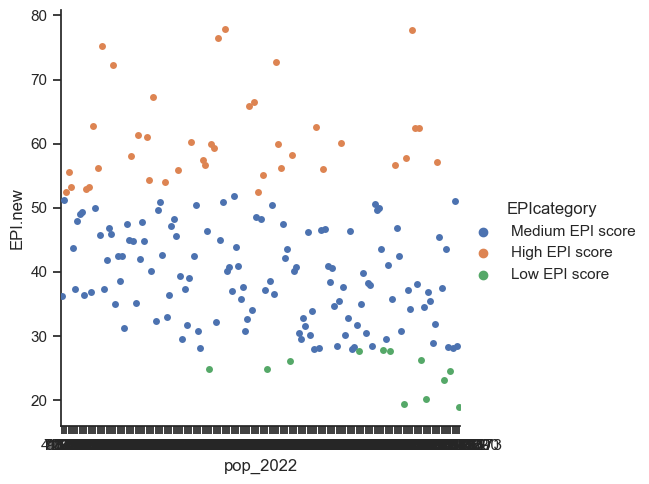

In [40]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
h = sns.catplot(x="pop_2022", y="EPI.new", hue="EPIcategory", data=df_epi_pop_gini)

#no significant correlation between gini, population, and a country's EPI score
#Something interesting is that there are only 12 (out of 179) countries that have a low score

In [41]:
# save figure
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gini_catplot.png'))

In [42]:
# save figure
h.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pop_catplot.png'))